In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

In [2]:
info = pd.read_csv('육군신체측정정보.csv',encoding = 'cp949')


/Users/gueunhye/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
info.head()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [4]:
info[:5]

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,1,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,3,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,4,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,5,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [5]:
info.tail()

,순번,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
167975,167979,20170131,100.6,86.4,173.2,86.7 (34.1 in),77.1,56.9,27.1,73.7
167976,167980,20170131,97.9,82.7,166.3,90.5 (35.6 in),73.4,61.5,28.8,70.7
167977,167981,20170131,97.9,87.2,175.2,94.3 (37.1 in),83.1,57.1,27.6,78.7
167978,167982,20170131,85.3,86.8,173.6,75.9 (29.9 in),76.6,57.6,24.3,57.4
167979,167983,20170131,86.6,88.3,175.8,73.0 (28.7 in),77.8,56.3,26.1,51.7


In [6]:
X = info.drop(['순번'],axis = 1)
X.head()

,측정 일자,가슴 둘레 센티미터,소매길이 센티미터,신장 센티미터,허리 둘레 센티미터,샅높이 센티미터,머리 둘레 센티미터,발 길이 센티미터,몸무게 킬로그램
0,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [7]:
X1 = X.rename(columns = {'측정 일자':'splt','가슴 둘레 센티미터':'chest','소매길이 센티미터':'arm','신장 센티미터':'height','허리 둘레 센티미터':'waist','샅높이 센티미터':'sat','머리 둘레 센티미터':'head','발 길이 센티미터':'feet','몸무게 킬로그램':'weight'})

In [8]:
X1.head()

,splt,chest,arm,height,waist,sat,head,feet,weight
0,20140106,96.3,92.6,185.5,82.5,83.8,57.1,28.5,73.2
1,2013,101.9,83.8,167.2,81.2,74.4,55.0,24.2,65.1
2,20140106,99.5,89.6,179.9,99.2,84.2,56.3,28.1,93.2
3,2013,98.6,85.5,171.4,85.9,76.4,54.5,27.4,71.6
4,20140106,94.7,88.1,176.9,78.3,79.7,58.5,26.5,67.1


In [9]:
X1[['chest', 'arm','height']]

,chest,arm,height
0,96.3,92.6,185.5
1,101.9,83.8,167.2
2,99.5,89.6,179.9
3,98.6,85.5,171.4
4,94.7,88.1,176.9
...,...,...,...
167975,100.6,86.4,173.2
167976,97.9,82.7,166.3
167977,97.9,87.2,175.2
167978,85.3,86.8,173.6


In [10]:
np.array(X1[['chest', 'arm','height']])

array([[ 96.3,  92.6, 185.5],
       [101.9,  83.8, 167.2],
       [ 99.5,  89.6, 179.9],
       ...,
       [ 97.9,  87.2, 175.2],
       [ 85.3,  86.8, 173.6],
       [ 86.6,  88.3, 175.8]])

In [11]:
X = X1[['chest', 'arm','height']]

In [12]:
X

,chest,arm,height
0,96.3,92.6,185.5
1,101.9,83.8,167.2
2,99.5,89.6,179.9
3,98.6,85.5,171.4
4,94.7,88.1,176.9
...,...,...,...
167975,100.6,86.4,173.2
167976,97.9,82.7,166.3
167977,97.9,87.2,175.2
167978,85.3,86.8,173.6


In [13]:
y = X1[['weight']]


In [14]:
y

,weight
0,73.2
1,65.1
2,93.2
3,71.6
4,67.1
...,...
167975,73.7
167976,70.7
167977,78.7
167978,57.4


In [29]:
np.max(X,axis= 0)

array([1., 1., 1.])

In [55]:
X = np.asarray(X)

X = X / np.max(X, axis=0)
X
y = y/np.max(y, axis = 0)

In [56]:
Y = np.asarray(y)
Y

array([[0.54222222],
       [0.48222222],
       [0.69037037],
       ...,
       [0.58296296],
       [0.42518519],
       [0.38296296]])

In [57]:
from tensorflow import keras

In [58]:
# 훈련/검증용 데이터 분할
X_train, X_Test,y_train,y_test = \
    train_test_split(X,Y,test_size = 0.2)

In [59]:
X_train.shape

(134384, 3)

In [60]:
model = keras.Sequential([
    keras.layers.Dense(3),
    keras.layers.Dense(256,activation = "relu"),
    keras.layers.Dense(1,activation = 'sigmoid')
])

In [61]:
model.compile(optimizer = "adam", loss = "mse", metrics = ['accuracy'])

In [62]:
EPOCHS = 20  # 예제 기본값은 50입니다.
from tensorflow import keras


In [63]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=EPOCHS)



************ TRAINING START ************ 
Train on 134384 samples
Epoch 1/20
134384/134384 [==============================] - 4s 32us/sample - loss: 0.0025 - accuracy: 8.1855e-05
Epoch 2/20
134384/134384 [==============================] - 4s 30us/sample - loss: 0.0018 - accuracy: 8.9296e-05
Epoch 3/20
134384/134384 [==============================] - 4s 30us/sample - loss: 0.0018 - accuracy: 8.1855e-05s - loss: 0.001
Epoch 4/20
134384/134384 [==============================] - 4s 29us/sample - loss: 0.0018 - accuracy: 8.9296e-05
Epoch 5/20
134384/134384 [==============================] - 4s 29us/sample - loss: 0.0018 - accuracy: 9.6738e-05
Epoch 6/20
134384/134384 [==============================] - 4s 29us/sample - loss: 0.0018 - accuracy: 8.9296e-05s - loss: 0.0018 - accuracy: 6.61 - ETA: 0s - loss: 0.0018 - accuracy: 
Epoch 7/20
134384/134384 [==============================] - 4s 29us/sample - loss: 0.0018 - accuracy: 9.6738e-05s - loss: 0.0018 - accura
Epoch 8/20
134384/134384 [====

In [64]:
pred = model.predict(X_train[:5])
pred

array([[0.53420186],
       [0.4097014 ],
       [0.4927729 ],
       [0.6097225 ],
       [0.45379   ]], dtype=float32)

In [65]:
y_train[:5]

array([[0.48518519],
       [0.44592593],
       [0.51185185],
       [0.56592593],
       [0.46592593]])

In [66]:
history.history["loss"]

[0.002531258989490745,
 0.0018289837841415125,
 0.0018161379607085635,
 0.0018068231962814596,
 0.001803970447191903,
 0.0018095241349124164,
 0.00179765416422451,
 0.0017985840912844889,
 0.0017942033736454374,
 0.0017936113963075157,
 0.0017861366262935535,
 0.001792298946193091,
 0.0017852851999534936,
 0.0017854456775875526,
 0.0017864881402302052,
 0.0017827624248820636,
 0.0017818078937438988,
 0.00178253178873445,
 0.0017791380193474793,
 0.0017792908872048252]

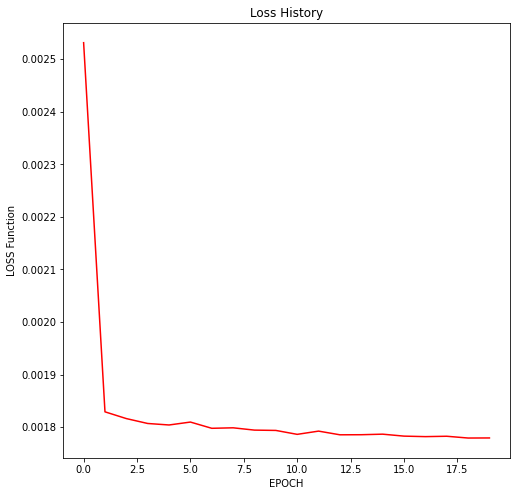

In [67]:
train_history = history.history["loss"]

fig = plt.figure(figsize=(8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")

fig.savefig("train_history.png")

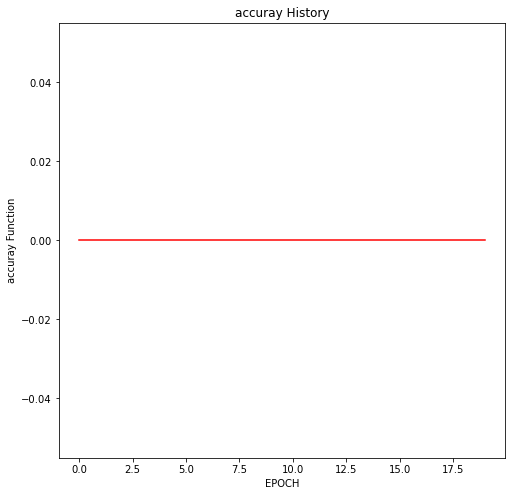

In [49]:
train_history = history.history["accuracy"]

fig = plt.figure(figsize=(8, 8))
plt.title("accuray History")
plt.xlabel("EPOCH")
plt.ylabel("accuray Function")
plt.plot(train_history, "red")

fig.savefig("accuray.png")